# Introdução

A análise abaixo foi feita utilizando dados provinientes do RH da empresa IBM que foram disponibilizados no site www.kaggle.com.

A minha motivação é entender o perfil das pessoas que deixam a empresa. Isso pode ser importante para previnir demissões, melhorar a satisfação dos colaboradores e diminuir os custos operacionais, o que como consequência, deve aumentar a produtividade da empresa.

Perguntas para responder com a análise:
- Existe diferença salarial entre homens e mulheres?
- Há alguma evidência em relação de que gênero impacta no atrito entre funcionário e empresa?
- Qual a relação entre salário e departamento em que o funcionário atua?

Fonte do dataset:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# 1. Carregando as bibliotecas

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 2. Carregando Dataset

In [3]:
df = pd.read_csv('analise-ibm-rh.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 3. Verificando a quantidade de linhas, colunas e tipos de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 4. Analisando os dados

# Verificando a distribuição de idade

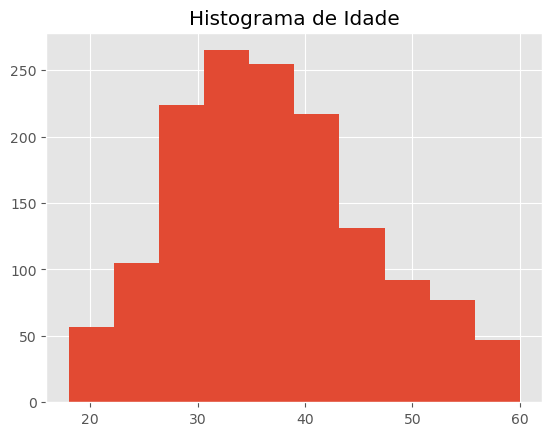

In [10]:
_= plt.hist(df.Age)
_= plt.title("Histograma de Idade")

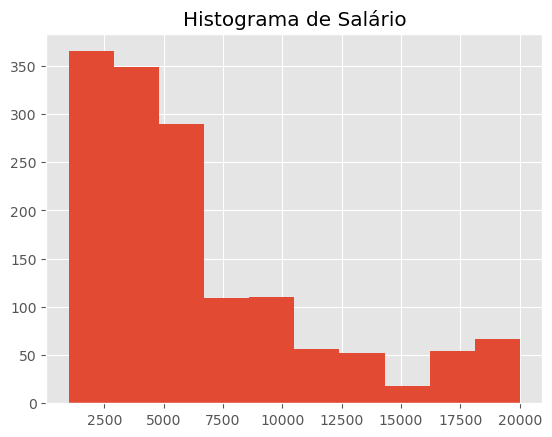

In [12]:
_ = plt.hist(df.MonthlyIncome)
_ = plt.title("Histograma de Salário")

É possível observar uma assimetria na distribuição, o maior número de funcionários gira em torno de 30 a 40 anos. 

# Verificando a distribuição por gênero

In [17]:
df.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [18]:
df.Gender.value_counts(1)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

# Verificando número de funcionários por Campo educacional

In [19]:
df.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

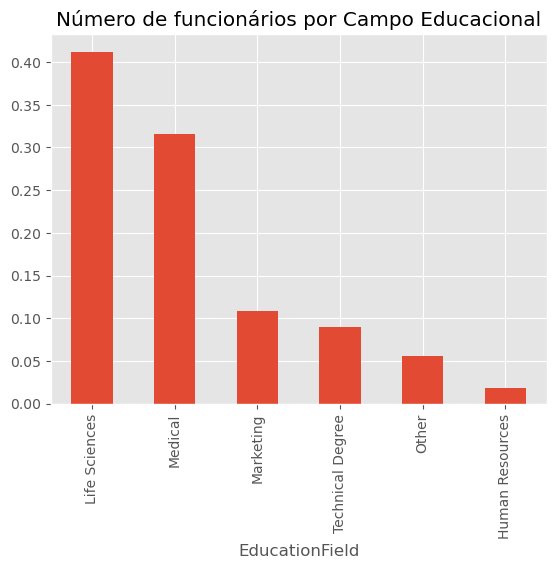

In [23]:
_ = df.EducationField.value_counts(1).plot.bar()
_ = plt.title("Número de funcionários por Campo Educacional") 

# Analisando variáveis

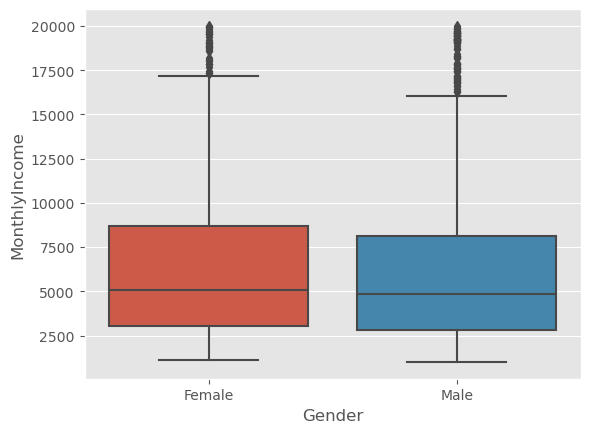

In [25]:
_ = sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

A distribuição salarial entre homens e mulheres é bem parecida. Normalmente, espera-se encontrar salários mais altos para homens. Porém, no caso da IBM, o isso parece não ocorrer.